In [14]:
from sklearn.preprocessing import MinMaxScaler
import numpy as np
import pandas as pd
import tensorflow as tf
import MIDASpy as md
import math


In [15]:
column_names=['column 1','column 2','column 3','column 4','column 5','column 6','column 7','column 8','column 9','column 10','column 6','column 6','column 6','column 6','column 6','column 6','column 6','column 6','column 6','column 6','column 6','column 6','column 6','column 6','column 6','column 6','column 6','column 6','column 6','column 6','column 6','column 6','column 6','column 6']
df=pd.read_excel(r'C:\Users\Jaber Shahnawaz\Downloads\Incomplete Datasets\Incomplete Datasets Without Labels\Ionosphere\Ionosphere_C_10.xlsx', header=None,names=column_names)
df

,column 1,column 2,column 3,column 4,column 5,column 6,column 7,column 8,column 9,column 10,...,column 6.15,column 6.16,column 6.17,column 6.18,column 6.19,column 6.20,column 6.21,column 6.22,column 6.23,column 6.24
0,1.0,0.0,0.99539,-0.05889,0.85243,0.02306,0.83398,-0.37708,1.00000,0.03760,...,0.56811,-0.51171,0.41078,-0.46168,0.21266,-0.34090,0.42267,-0.54487,0.18641,-0.45300
1,1.0,0.0,1.00000,-0.18829,NaN,-0.36156,-0.10868,-0.93597,1.00000,-0.04549,...,-0.20332,-0.26569,-0.20468,NaN,-0.19040,-0.11593,-0.16626,-0.06288,-0.13738,-0.02447
2,1.0,0.0,1.00000,-0.03365,1.00000,0.00485,1.00000,-0.12062,0.88965,0.01198,...,0.57528,-0.40220,NaN,-0.22145,0.43100,-0.17365,NaN,-0.24180,0.56045,-0.38238
3,1.0,0.0,1.00000,-0.45161,1.00000,1.00000,0.71216,-1.00000,0.00000,0.00000,...,1.00000,0.90695,0.51613,1.00000,1.00000,-0.20099,0.25682,1.00000,-0.32382,1.00000
4,1.0,0.0,1.00000,-0.02401,0.94140,0.06531,0.92106,-0.23255,0.77152,-0.16399,...,0.03286,-0.65158,0.13290,-0.53206,0.02431,-0.62197,-0.05707,-0.59573,-0.04608,-0.65697
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
346,1.0,0.0,0.83508,0.08298,0.73739,-0.14706,0.84349,-0.05567,0.90441,-0.04622,...,0.95378,-0.04202,0.83479,0.00123,1.00000,0.12815,NaN,-0.10714,0.90546,-0.04307
347,NaN,0.0,0.95113,0.00419,0.95183,-0.02723,0.93438,-0.01920,0.94590,NaN,...,0.94520,0.01361,0.93522,0.04925,0.93159,0.08168,0.94066,-0.00035,0.91483,0.04712
348,1.0,0.0,0.94701,-0.00034,0.93207,-0.03227,0.95177,-0.03431,0.95584,0.02446,...,0.93988,0.03193,0.92489,0.02542,0.92120,0.02242,0.92459,0.00442,0.92697,-0.00577
349,1.0,0.0,0.90608,-0.01657,0.98122,-0.01989,0.95691,-0.03646,0.85746,0.00110,...,0.91050,-0.02099,0.89147,-0.07760,0.82983,-0.17238,0.96022,-0.03757,0.87403,-0.16243


In [16]:
print('dataType',end='\t')
print('column_names',end='\t')
print('Number of Nulls')
for name in column_names:
    print(df[name].dtype,end='\t\t')
    print(name,end='\t')
    print(df[name].isnull().sum())

dataType	column_names	Number of Nulls
float64		column 1	14
float64		column 2	13
float64		column 3	26
float64		column 4	20
float64		column 5	17
float64		column 6	21
float64		column 7	13
float64		column 8	20
float64		column 9	22
float64		column 10	18
float64		column 6	21
float64		column 6	21
float64		column 6	21
float64		column 6	21
float64		column 6	21
float64		column 6	21
float64		column 6	21
float64		column 6	21
float64		column 6	21
float64		column 6	21
float64		column 6	21
float64		column 6	21
float64		column 6	21
float64		column 6	21
float64		column 6	21
float64		column 6	21
float64		column 6	21
float64		column 6	21
float64		column 6	21
float64		column 6	21
float64		column 6	21
float64		column 6	21
float64		column 6	21
float64		column 6	21


In [17]:
df.describe()

,column 1,column 2,column 3,column 4,column 5,column 6,column 7,column 8,column 9,column 10,...,column 6.15,column 6.16,column 6.17,column 6.18,column 6.19,column 6.20,column 6.21,column 6.22,column 6.23,column 6.24
count,337.000000,338.0,325.000000,331.000000,334.000000,330.000000,338.000000,331.000000,329.000000,333.000000,...,336.000000,344.000000,339.000000,335.000000,336.000000,327.000000,334.000000,327.000000,331.000000,328.000000
mean,0.890208,0.0,0.634870,0.029683,0.600341,0.125894,0.548133,0.123551,0.508257,0.168478,...,0.395491,-0.074676,0.541005,-0.068686,0.391163,-0.025351,0.343113,-0.004775,0.362598,0.015037
std,0.313096,0.0,0.508167,0.435211,0.525733,0.464932,0.496976,0.508730,0.512183,0.469032,...,0.578902,0.509711,0.516218,0.547102,0.566771,0.510316,0.577268,0.519074,0.516474,0.469560
min,0.000000,0.0,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000
25%,1.000000,0.0,0.467850,-0.062625,0.424420,-0.024350,0.209105,-0.052915,0.087760,-0.050710,...,0.000000,-0.336063,0.278955,-0.426765,0.000000,-0.236885,0.000000,-0.249325,0.000000,-0.158177
50%,1.000000,0.0,0.870480,0.011050,0.810565,0.029305,0.728000,0.013860,0.684210,0.016390,...,0.549175,-0.015995,0.708240,-0.016470,0.507815,0.000000,0.431185,0.000000,0.421890,0.000000
75%,1.000000,0.0,1.000000,0.171745,1.000000,0.353128,0.970445,0.399775,0.947210,0.464270,...,0.909400,0.155608,0.999945,0.153535,0.887798,0.153395,0.859490,0.202670,0.832195,0.172890
max,1.000000,0.0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


<AxesSubplot:>

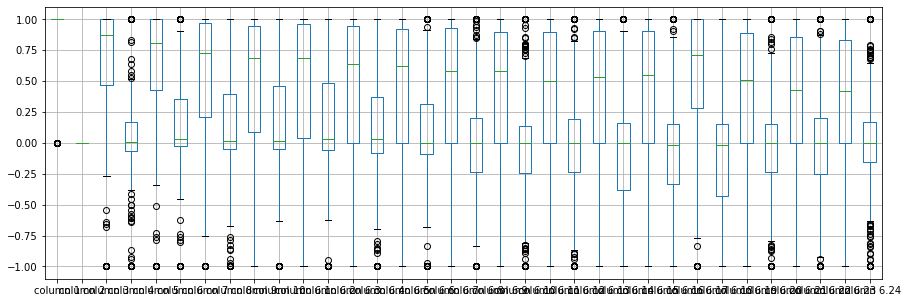

In [18]:
df.boxplot(return_type='axes', figsize=(15,5))

In [19]:
df.mean()

column 1       0.890208
column 2       0.000000
column 3       0.634870
column 4       0.029683
column 5       0.600341
column 6       0.125894
column 7       0.548133
column 8       0.123551
column 9       0.508257
column 10      0.168478
column 6.1     0.486273
column 6.2     0.162388
column 6.3     0.400300
column 6.4     0.087095
column 6.5     0.356080
column 6.6     0.071449
column 6.7     0.367007
column 6.8    -0.003959
column 6.9     0.365474
column 6.10   -0.027112
column 6.11    0.332022
column 6.12    0.015531
column 6.13    0.366097
column 6.14   -0.066656
column 6.15    0.395491
column 6.16   -0.074676
column 6.17    0.541005
column 6.18   -0.068686
column 6.19    0.391163
column 6.20   -0.025351
column 6.21    0.343113
column 6.22   -0.004775
column 6.23    0.362598
column 6.24    0.015037
dtype: float64

In [20]:
corr=df.corr()
corr

,column 1,column 2,column 3,column 4,column 5,column 6,column 7,column 8,column 9,column 10,...,column 6.15,column 6.16,column 6.17,column 6.18,column 6.19,column 6.20,column 6.21,column 6.22,column 6.23,column 6.24
column 1,1.000000,NaN,0.317902,0.048224,0.136733,0.115958,0.245174,0.023062,0.190792,-0.047665,...,0.031632,0.131076,-0.237780,-0.010290,0.135973,-0.153011,0.175536,-0.111181,0.116290,0.006436
column 2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
column 3,0.317902,NaN,1.000000,0.227147,0.489111,0.029111,0.445175,-0.071928,0.448252,0.080719,...,0.303316,-0.067545,0.090933,0.182804,0.335463,0.054949,0.236742,0.002471,0.283133,0.012809
column 4,0.048224,NaN,0.227147,1.000000,0.016376,-0.194693,-0.007400,0.194481,-0.307127,0.269096,...,-0.113303,-0.184048,-0.061242,0.030157,-0.075915,0.312977,-0.164947,-0.129947,-0.124008,0.014077
column 5,0.136733,NaN,0.489111,0.016376,1.000000,0.053479,0.615703,-0.037140,0.464714,-0.004098,...,0.245285,-0.001223,0.153613,0.169698,0.267711,0.050845,0.384576,0.039951,0.391756,-0.094558
column 6,0.115958,NaN,0.029111,-0.194693,0.053479,1.000000,0.021957,0.303623,-0.146877,0.187080,...,-0.149872,0.009730,-0.153435,-0.080565,0.001402,-0.149244,-0.085096,0.332149,0.022333,0.173785
column 7,0.245174,NaN,0.445175,-0.007400,0.615703,0.021957,1.000000,-0.155915,0.472986,-0.049090,...,0.309623,0.107180,0.101317,0.097414,0.316281,-0.007138,0.402412,0.016699,0.554261,-0.069241
column 8,0.023062,NaN,-0.071928,0.194481,-0.037140,0.303623,-0.155915,1.000000,-0.388965,0.429470,...,-0.200386,-0.094861,-0.247016,0.046382,-0.154759,0.056357,-0.200135,0.157023,-0.207384,0.296163
column 9,0.190792,NaN,0.448252,-0.307127,0.464714,-0.146877,0.472986,-0.388965,1.000000,-0.265761,...,0.339598,0.115736,0.161464,0.180735,0.316467,-0.072204,0.314839,-0.080227,0.313747,-0.081346
column 10,-0.047665,NaN,0.080719,0.269096,-0.004098,0.187080,-0.049090,0.429470,-0.265761,1.000000,...,-0.291038,-0.010432,-0.272150,0.072805,-0.127265,-0.008156,-0.174520,-0.012249,-0.266375,0.078595


In [21]:
tf.compat.v1.reset_default_graph()
import tensorflow.compat.v1 as tf
tf.reset_default_graph()


In [22]:
imputer = md.Midas(layer_structure = [34,34+12,34+12+12,34+12+12+12,34+12+12+12+12,34+12+12+12,34+12+12,34+12,34], vae_layer = False, seed = 120)
imputer.build_model(df)
imputer.train_model(training_epochs=100)


Size index: [34]

Computation graph constructed

Model initialised

Epoch: 0 , loss: 19.326831181844074
Epoch: 1 , loss: 19.277692159016926
Epoch: 2 , loss: 19.2189519064767
Epoch: 3 , loss: 19.23328772045317
Epoch: 4 , loss: 19.294899804251536
Epoch: 5 , loss: 19.122378394717263
Epoch: 6 , loss: 19.008709952944802
Epoch: 7 , loss: 19.090142976670037
Epoch: 8 , loss: 19.019795145307267
Epoch: 9 , loss: 18.991570608956472
Epoch: 10 , loss: 18.980554035731725
Epoch: 11 , loss: 18.805747304643905
Epoch: 12 , loss: 18.6422054654076
Epoch: 13 , loss: 18.537374087742396
Epoch: 14 , loss: 18.405660538446334
Epoch: 15 , loss: 17.87257126399449
Epoch: 16 , loss: 17.552394094921294
Epoch: 17 , loss: 16.963033085777646
Epoch: 18 , loss: 16.87376004173642
Epoch: 19 , loss: 16.72234635126023
Epoch: 20 , loss: 16.616666702997115
Epoch: 21 , loss: 16.665950775146484
Epoch: 22 , loss: 16.667570341201056
Epoch: 23 , loss: 16.647448630560014
Epoch: 24 , loss: 16.575150898524694
Epoch: 25 , loss: 16.6578

In [23]:
imputations=imputer.generate_samples(m=15).output_list
np.shape(imputations[-1])

INFO:tensorflow:Restoring parameters from tmp/MIDAS
Model restored.


(351, 34)

In [24]:
new_df=imputations[-1]
new_df.iloc[21,:]


column 1       0.000000
column 2       0.000000
column 3       1.000000
column 4       1.000000
column 5       0.000000
column 6       0.000000
column 7       0.000000
column 8       0.000000
column 9      -1.000000
column 10     -1.000000
column 6.1     0.000000
column 6.2     0.000000
column 6.3     0.000000
column 6.4     0.003698
column 6.5    -1.000000
column 6.6    -1.000000
column 6.7    -1.000000
column 6.8    -1.000000
column 6.9    -1.000000
column 6.10    1.000000
column 6.11   -1.000000
column 6.12    1.000000
column 6.13    0.000000
column 6.14    0.000000
column 6.15    0.000000
column 6.16    0.000000
column 6.17    1.000000
column 6.18   -1.000000
column 6.19   -1.000000
column 6.20    1.000000
column 6.21   -1.000000
column 6.22    1.000000
column 6.23   -0.178280
column 6.24    1.000000
Name: 21, dtype: float64

In [25]:
complete_df=pd.read_excel(r'C:\Users\Jaber Shahnawaz\Downloads\Original Datasets (1)\Original Datasets Without Labels\Ionosphere.xlsx', header=None,names=column_names)

In [26]:
new_df-complete_df

,column 1,column 2,column 3,column 4,column 5,column 6,column 7,column 8,column 9,column 10,...,column 6.15,column 6.16,column 6.17,column 6.18,column 6.19,column 6.20,column 6.21,column 6.22,column 6.23,column 6.24
0,0.000000,0.00000,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000000,...,0.0,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0
1,0.000000,0.00000,0.0,0.000000,-0.734053,0.0,0.0,0.0,0.0,0.000000,...,0.0,0.0,0.000000,0.184042,0.0,0.0,0.000000,0.0,0.0,0.0
2,0.000000,0.00000,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000000,...,0.0,0.0,-0.243812,0.000000,0.0,0.0,-0.330730,0.0,0.0,0.0
3,0.000000,0.00000,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000000,...,0.0,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0
4,0.000000,0.00000,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000000,...,0.0,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
346,0.000000,0.00000,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000000,...,0.0,0.0,0.000000,0.000000,0.0,0.0,-0.312436,0.0,0.0,0.0
347,-0.362384,0.00000,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.019847,...,0.0,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0
348,0.000000,0.00000,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000000,...,0.0,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0
349,0.000000,0.00000,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000000,...,0.0,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0


Calculating NRMSE Value

In [27]:

def Sum_new(sum):
    summ=0
    for n in sum:
        summ=summ+n
    return (summ)



In [28]:
def Frobenius_norm(number):
    num=number
    abs_val=num.abs()
    power_abs=abs_val**2
    sum1=power_abs.sum()
    total_sum=Sum_new(sum1)
    return(math.sqrt(total_sum))

In [29]:
numerator=Frobenius_norm(new_df-complete_df)
numerator

12.53671417562899

In [30]:
denominator=Frobenius_norm(complete_df)
denominator

68.46016929900117

In [31]:
NRMS=numerator/denominator
NRMS


0.18312420644001973

In [32]:
new_df.iloc[66,:]

column 1       1.000000
column 2       0.000000
column 3       1.000000
column 4       0.280460
column 5       1.000000
column 6       0.024770
column 7       1.000000
column 8       0.077640
column 9       1.000000
column 10      0.043170
column 6.1     0.987620
column 6.2     0.332660
column 6.3     1.000000
column 6.4     0.054890
column 6.5     1.000000
column 6.6     0.043840
column 6.7     0.957500
column 6.8    -0.245980
column 6.9     0.843710
column 6.10   -0.086680
column 6.11    0.580926
column 6.12    0.041500
column 6.13    0.999330
column 6.14    0.273760
column 6.15    1.000000
column 6.16   -0.390560
column 6.17    0.964140
column 6.18   -0.021740
column 6.19    0.867470
column 6.20    0.009969
column 6.21    0.945780
column 6.22   -0.220210
column 6.23    0.803550
column 6.24   -0.073290
Name: 66, dtype: float64

In [33]:
imputations[-1]


,column 1,column 2,column 3,column 4,column 5,column 6,column 7,column 8,column 9,column 10,...,column 6.15,column 6.16,column 6.17,column 6.18,column 6.19,column 6.20,column 6.21,column 6.22,column 6.23,column 6.24
0,1.000000,0.00000,0.99539,-0.058890,0.852430,0.02306,0.83398,-0.37708,1.00000,0.037600,...,0.56811,-0.51171,0.410780,-0.461680,0.21266,-0.34090,0.422670,-0.54487,0.18641,-0.45300
1,1.000000,0.00000,1.00000,-0.188290,0.196297,-0.36156,-0.10868,-0.93597,1.00000,-0.045490,...,-0.20332,-0.26569,-0.204680,0.000032,-0.19040,-0.11593,-0.166260,-0.06288,-0.13738,-0.02447
2,1.000000,0.00000,1.00000,-0.033650,1.000000,0.00485,1.00000,-0.12062,0.88965,0.011980,...,0.57528,-0.40220,0.346028,-0.221450,0.43100,-0.17365,0.273630,-0.24180,0.56045,-0.38238
3,1.000000,0.00000,1.00000,-0.451610,1.000000,1.00000,0.71216,-1.00000,0.00000,0.000000,...,1.00000,0.90695,0.516130,1.000000,1.00000,-0.20099,0.256820,1.00000,-0.32382,1.00000
4,1.000000,0.00000,1.00000,-0.024010,0.941400,0.06531,0.92106,-0.23255,0.77152,-0.163990,...,0.03286,-0.65158,0.132900,-0.532060,0.02431,-0.62197,-0.057070,-0.59573,-0.04608,-0.65697
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
346,1.000000,0.00000,0.83508,0.082980,0.737390,-0.14706,0.84349,-0.05567,0.90441,-0.046220,...,0.95378,-0.04202,0.834790,0.001230,1.00000,0.12815,0.554164,-0.10714,0.90546,-0.04307
347,0.637616,0.00000,0.95113,0.004190,0.951830,-0.02723,0.93438,-0.01920,0.94590,0.035907,...,0.94520,0.01361,0.935220,0.049250,0.93159,0.08168,0.940660,-0.00035,0.91483,0.04712
348,1.000000,0.00000,0.94701,-0.000340,0.932070,-0.03227,0.95177,-0.03431,0.95584,0.024460,...,0.93988,0.03193,0.924890,0.025420,0.92120,0.02242,0.924590,0.00442,0.92697,-0.00577
349,1.000000,0.00000,0.90608,-0.016570,0.981220,-0.01989,0.95691,-0.03646,0.85746,0.001100,...,0.91050,-0.02099,0.891470,-0.077600,0.82983,-0.17238,0.960220,-0.03757,0.87403,-0.16243


In [34]:
imputations[-1].to_excel("Ionosphere_C_5(imp).xlsx", index=False, header=False)